Import and load data 

In [7]:
import numpy as np
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print("Number of training samples:",len(train_images))
print("Number of testing samples:", len(test_images))
print("Possible labels:", np.unique(train_labels))

Number of training samples: 60000
Number of testing samples: 10000
Possible labels: [0 1 2 3 4 5 6 7 8 9]


Adjust data

In [8]:
from keras.utils import to_categorical

train_images = np.reshape(train_images, (60000, 28, 28, 1))
train_images = train_images.astype('float32')

test_images = np.reshape(test_images, (10000, 28, 28, 1))
test_images = test_images.astype('float32')

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Prepare neural network

In [9]:
from keras import models
from keras import layers
  
network = models.Sequential()
network.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)))
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)))
network.add(layers.Flatten())
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

print(network.summary())

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
______________________________________

Fit the model

In [10]:
history = network.fit(train_images, train_labels, batch_size=64, epochs=5)


Epoch 1/5
60000/60000 [==============================] - 24s 401us/step - loss: 0.3083 - accuracy: 0.9392
Epoch 2/5
60000/60000 [==============================] - 27s 450us/step - loss: 0.0641 - accuracy: 0.9823
Epoch 3/5
60000/60000 [==============================] - 29s 483us/step - loss: 0.0488 - accuracy: 0.9874
Epoch 4/5
60000/60000 [==============================] - 28s 474us/step - loss: 0.0431 - accuracy: 0.9888
Epoch 5/5
60000/60000 [==============================] - 29s 481us/step - loss: 0.0401 - accuracy: 0.9901


Plot the accuracy and loss

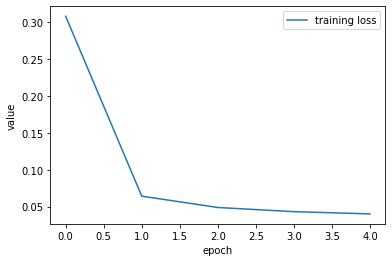

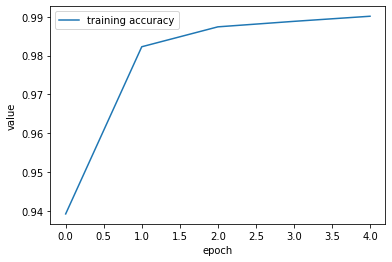

In [11]:
%matplotlib inline 
from matplotlib import pyplot as plt

history_dict = history.history    
    
training_loss = history_dict['loss']
plt.plot(range(len(training_loss)), training_loss, label='training loss')
plt.xlabel('epoch')
plt.ylabel('value')
plt.legend()
plt.show()
    
training_acc = history_dict['accuracy']
plt.plot(range(len(training_acc)), training_acc, label='training accuracy')
plt.xlabel('epoch')
plt.ylabel('value')
plt.legend()
plt.show()

Network evaluation

In [12]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 1s 92us/step
test_acc: 0.9891999959945679
